# Import

In [1]:
import csv
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from nltk import word_tokenize
from tqdm import tqdm

## Add configuration file

In [2]:
sys.path.append("/home/jovyan/core/config/")

In [3]:
from ALL import config 

## Set condition

In [4]:
tqdm.pandas()
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 50)

In [72]:
data_type = "AgNewsTitle"
vectorize_type = "sentenceBERT"

# Read data

In [73]:
df = pd.read_csv(f"../../Preprocessing/data/{data_type}/master.csv", index_col=0)

In [74]:
with open(f"../../Preprocessing/data/{data_type}/class.csv", mode="r") as f:
    reader = csv.reader(f)
    class_labels = [label for label in reader]

In [111]:
class_nums = config["data"][data_type]["class_num"]

# Top Text

In [75]:
vector_dim = 10
covariance_type = "diag"
model_num = 12

In [76]:
dist = np.load(f"../../Clustering/data/{data_type}/{vectorize_type}/GMM/dist/{vector_dim}/{covariance_type}/{model_num}.npy")
pred = np.load(f"../../Clustering/data/{data_type}/{vectorize_type}/GMM/pred/{vector_dim}/{covariance_type}/{model_num}.npy")

In [115]:
def getmax_rev(series, topnum=100, getmin=False, getindex=False):
    out = series.nsmallest(topnum) if getmin else series.nlargest(topnum)
    return out.index if getindex else out.set_axis(pd.RangeIndex(1, topnum+1))

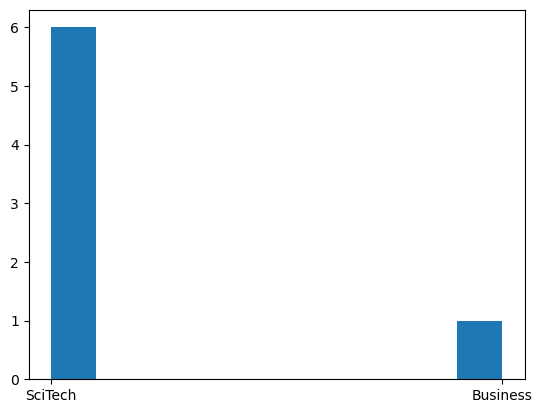

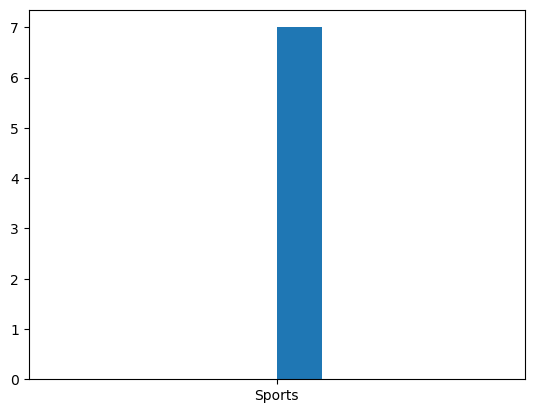

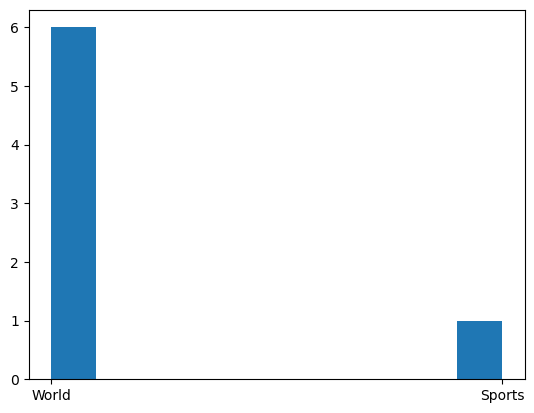

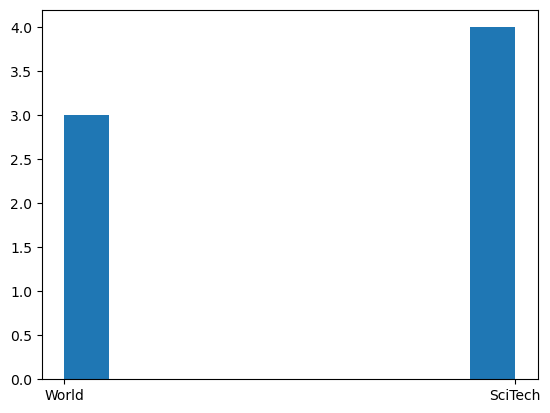

In [147]:
for class_num in range(class_nums):
    dist_df = pd.DataFrame(dist)
    top_index = getmax_rev(dist_df[class_num], topnum=7, getmin=True, getindex=True)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.hist(df.loc[top_index, "class"])

In [148]:
classes = ["Business", "Sports", "World", "SciTech"]

In [149]:
df_locs = {}
for class_num in range(class_nums):
    dist_df = pd.DataFrame(dist)
    top_index = getmax_rev(dist_df[class_num], topnum=7, getmin=True, getindex=True)

    df_loc = df.loc[top_index, :]
    df_locs[classes[class_num]] = df_loc[df_loc["class"] == classes[class_num]]

In [170]:
top_texts = pd.concat([df_locs[_class].iloc[0, :] for _class in classes], axis=1)

In [173]:
top_text_chart = top_texts.T[["class", "text"]].set_index("class")

In [174]:
print(
    top_text_chart.style.format(precision=3, escape="latex").to_latex(
        column_format="rr",
        position="h",
        position_float="centering",
        hrules=True,
        caption="トピックの中心に近いテキスト",
        label="table:2",
        multicol_align="r",
    )
)

\begin{table}[h]
\centering
\caption{トピックの中心に近いテキスト}
\label{table:2}
\begin{tabular}{rr}
\toprule
 & text \\
class &  \\
\midrule
Business & Infosys Profit Growth Best in Three Years \\
Sports & Biggest Bosh basher is Chris \\
World & AP: Militants Funding Terror With Heists (AP) \\
SciTech & Sea Knowledge Not Very Deep \\
\bottomrule
\end{tabular}
\end{table}

